# **Text generator**

## **Importing librairies**

In [211]:
import tensorflow as tf
import pandas as pd
import numpy as np

## **Read data**

In [212]:
def import_data(input_text):
    with open(input_text, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

input_text = import_data("input.txt")

print("Text is {} characters long".format(len(input_text)))

Text is 1115394 characters long


## **Text preprocessing**

In [213]:
print("First 250 characters :\n\n", input_text[:250])

First 250 characters :

 First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



### **Unique characters**

We use **sorted** and **set** methods to retrieve unique characters

In [214]:
unique_character = sorted(set(input_text))
print("Unique characters :\n\n", unique_character, "\n")
print(f"Unique characters is : {len(unique_character)}")

Unique characters :

 ['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'] 

Unique characters is : 65


### **Unique characters array**

In [215]:
unique_char_array = np.array(unique_character)
unique_char_array

array(['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?',
       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
      dtype='<U1')

### **Assign a number to each unique character in a dictionary**

In [216]:
def assign_number_character(character):
    char_to_int = {j:i for i, j in enumerate(unique_character)}
    return char_to_int

char_int = assign_number_character(unique_character)

In [217]:
print(char_int)

{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}


## **Vectorize the text**

In [218]:
text_to_integer = np.array([char_int[i] for i in input_text], dtype=np.int32)

print (f'First 60 characters : \n\n {repr(input_text[:60])} \n\n Mapped first 60 characters into integers:\n\n {repr(text_to_integer[:60])}')

First 60 characters : 

 'First Citizen:\nBefore we proceed any further, hear me speak.' 

 Mapped first 60 characters into integers:

 array([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43,
       44, 53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39,
       52, 63,  1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1,
       51, 43,  1, 57, 54, 43, 39, 49,  8])


## **Create training sequence**

The output text data will be the text sequence shifted one character forward.

For example :

**input sequence** : "What is your nam"

**Output sequence** : "hat is your name”

We can use tensorflow's [**tf.data.Dataset.from_tensor_slices**](https://www.tensorflow.org/guide/data?hl=fr) function to convert a text vector into a stream of character indices.

For more information, see the help method below :

**help(tf.data.Dataset.from_tensor_slices)**

In [219]:
character_dataset = tf.data.Dataset.from_tensor_slices(text_to_integer)

for character in character_dataset.take(15):
    print(unique_char_array[character.numpy()])

F
i
r
s
t
 
C
i
t
i
z
e
n
:




### **Batch sequence**


[**Batch method for creating batch sequences**](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch)

In [220]:
# We set the maximum sentence length to 140 to fit most sentences

seq_length = 140

total_number_sequences = len(input_text) // (seq_length + 1)

print('Total number sequences in the text :', total_number_sequences)

Total number sequences in the text : 7910


The **batch** method converts these consecutive elements of individual characters into **batch sequences**. We use **seq_len+1** because of zero indexing. Let's set **drop_remainder** to True so we can always keep the same batch size.

In [221]:
sequences =character_dataset.batch(seq_length  + 1, drop_remainder=True)

In [222]:
# Sequences size is the same as total number sequences in the text

print(f'Total number of sequences : {len(list(sequences.as_numpy_iterator()))} \n');

# Example of first 6 sentence sequences
for item in sequences.take(6):
    print(repr(''.join(unique_char_array[item.numpy()])))

Total number of sequences : 7910 

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou are all resolved rather to die than to f'
"amish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you know Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFir"
"st Citizen:\nLet us kill him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be done: away, away!\n\nS"
'econd Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citizens, the patricians good.\nWhat authority surfeits on would'
' relieve us: if they\nwould yield us but the superfluity, while it were\nwholesome, we might guess they relieved us humanely;\nbut they think we'
' are too dear: the leanness that\nafflicts us, the object of our misery, is as an\ninventory to particularise their abundance; our\nsufferance i'


## **Create an input text dataset and a target text dataset**


For example, let's say **seq_length** is 4 and our text is **name**. The input sequence would be **nam** and the target sequence **ame**. We define a function to create our input sequences and our target sequences.

In [223]:
def create_sequence_input_target(sequence):
    input_txt = sequence[:-1]
    target_txt = sequence[1:]
    return input_txt, target_txt

In [224]:
dataset = sequences.map(create_sequence_input_target)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


### **Let's see the first input and target sequence**

In [225]:
for input_txt, target_txt in dataset.take(1):
    
    print('Dataset sequence size :', len(dataset))
    print('Input sequence size :', repr(len(input_txt.numpy())))
    print('Target sequence size :', repr(len(target_txt.numpy())), "\n")
    
    print('Input :', repr(''.join(unique_char_array[input_txt.numpy()])), "\n")
    print(input_txt.numpy(), "\n")
    
    print('Target :', repr(''.join(unique_char_array[target_txt.numpy()])), "\n")
    print(target_txt.numpy(), "\n")

Dataset sequence size : 7910
Input sequence size : 140
Target sequence size : 140 

Input : 'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou are all resolved rather to die than to ' 

[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56  1 51 43  1 57 54 43 39 49  8  0  0 13 50 50 10  0 31 54 43 39 49
  6  1 57 54 43 39 49  8  0  0 18 47 56 57 58  1 15 47 58 47 64 43 52 10
  0 37 53 59  1 39 56 43  1 39 50 50  1 56 43 57 53 50 60 43 42  1 56 39
 58 46 43 56  1 58 53  1 42 47 43  1 58 46 39 52  1 58 53  1] 

Target : 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou are all resolved rather to die than to f' 

[47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43  1
 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43 39
 56  1 51 43  1 57 5

## **Generate batch sequences**

We divided the text into sequences using **tf.data.dataset**. But before we feed this data into the model, we need to mix and batch it.

[**Batch and Shuffle**](https://www.youtube.com/watch?v=c7G5W4Wv72Q)

[**Batch**](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch)

[**Shuffle**](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle)

[**Meaning of buffer_size**](https://stackoverflow.com/questions/46444018/meaning-of-buffer-size-in-dataset-map-dataset-prefetch-and-dataset-shuffle)

In [226]:
# Batch size
batch_size = 100
buffer_size = 10000

In [227]:
dataset = dataset.shuffle(buffer_size).batch(batch_size, drop_remainder=True)

In [228]:
dataset

<BatchDataset shapes: ((100, 140), (100, 140)), types: (tf.int32, tf.int32)>

In [229]:
print(f'Batched dataset size: {len(list(dataset.as_numpy_iterator()))}')

Batched dataset size: 79


In [230]:
for input_text, target_text in dataset.take(1):
    print('First batch : input_text : \n\n', input_text, "\n\n")

    print('First batch : target_text : \n\n', target_text)

First batch : input_text : 

 tf.Tensor(
[[ 1 61 39 ...  8  1 14]
 [61 52 10 ...  1 57 46]
 [ 1 57 47 ...  1 57 54]
 ...
 [53  1 58 ... 59 58  1]
 [42  1 46 ...  1 39 51]
 [46 63  1 ...  8  0  0]], shape=(100, 140), dtype=int32) 


First batch : target_text : 

 tf.Tensor(
[[61 39 58 ...  1 14 63]
 [52 10  0 ... 57 46 43]
 [57 47 56 ... 57 54 50]
 ...
 [ 1 58 46 ... 58  1 40]
 [ 1 46 39 ... 39 51  1]
 [63  1 50 ...  0  0 30]], shape=(100, 140), dtype=int32)


## **Create model**

### **Important parameters**

In [231]:
# Length of unique characters 
character_size = len(unique_character)

# The embedding dimensiong
embed_dim = 64

# Number of RNN units
rnn_neurons = 1026

### **Important Libraries**

In [232]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,GRU

### **Sequential model**

[Sequential model](https://keras.io/guides/sequential_model/)

### **Loss function**

[sparse_categorical_crossentropy](https://keras.io/api/losses/probabilistic_losses/#sparse_categorical_crossentropy-function:~:text=%5Bsource%5D-,sparse_categorical_crossentropyfonction,-tf.keras)

[losses](https://keras.io/api/losses/)

In [233]:
from tensorflow.keras.losses import sparse_categorical_crossentropy

def sparse_cat_loss(y_true,y_pred):
    
  return sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)

### **Optimizer**

[Optimizer Adam](https://keras.io/keras_core/api/optimizers/adam/)

[Optimizer Adam](https://stackoverflow.com/questions/42966393/is-it-good-learning-rate-for-adam-method) 

### **Embedding layer**

[Embedding layer](https://keras.io/api/layers/core_layers/embedding/)

### **GRU layer**

[GRU layer](https://keras.io/api/layers/recurrent_layers/gru/)

### **Dense layer**

[Dense layer](https://keras.io/api/layers/core_layers/dense/)

### **Function to build the model**

In [234]:
def create_model(character_size, embed_dim, rnn_neurons, batch_size):
    
    model = Sequential()
    
    model.add(Embedding(character_size, embed_dim, batch_input_shape=[batch_size, None]))
    
    model.add(GRU(rnn_neurons,return_sequences=True,
                  
            stateful=True,recurrent_initializer='glorot_uniform'))
    
    # Final dense prediction layer
    model.add(Dense(character_size))
    
    model.compile(optimizer='adam', loss=sparse_cat_loss) 
    
    return model

### **Apply this function to the model**

In [235]:
model = create_model(
  
  character_size = character_size,
    
  embed_dim = embed_dim,
    
  rnn_neurons = rnn_neurons,
    
  batch_size = batch_size)

### **Model summary**

In [236]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (100, None, 64)           4160      
_________________________________________________________________
gru_1 (GRU)                  (100, None, 1026)         3361176   
_________________________________________________________________
dense_1 (Dense)              (100, None, 65)           66755     
Total params: 3,432,091
Trainable params: 3,432,091
Non-trainable params: 0
_________________________________________________________________


### **Make a prediction**

In [237]:
for input_batch, target_batch in dataset.take(1):

  # Predict on a random batch
  batch_predictions = model(input_batch)

  # Show prediction dimensions
  print("(batch_size, sequence_length, vocab_size) :", batch_predictions.shape)

(batch_size, sequence_length, vocab_size) : (100, 140, 65)


In [238]:
batch_predictions[0]

<tf.Tensor: shape=(140, 65), dtype=float32, numpy=
array([[-5.9129312e-03,  4.9235863e-03,  4.8190127e-03, ...,
         4.8950221e-03, -7.7561103e-04,  8.5943611e-03],
       [-4.7189635e-03, -5.1007718e-03,  5.1874417e-04, ...,
        -2.1569394e-03,  9.1702602e-04,  1.2824715e-03],
       [-4.9849623e-03, -9.7254692e-03, -7.4831652e-03, ...,
        -1.2479336e-03, -5.3323382e-03, -2.8109383e-03],
       ...,
       [-1.3473843e-03, -3.9229491e-03, -7.2972379e-03, ...,
        -5.4390579e-03,  4.2343553e-04, -2.9438946e-03],
       [-1.7628614e-03,  9.5512471e-05, -1.1989098e-02, ...,
        -2.7793855e-04,  3.5751036e-03, -3.2973664e-03],
       [ 1.5641151e-03,  7.8698259e-04, -5.2605355e-03, ...,
         7.3772026e-03, -6.8745168e-04,  1.3171420e-03]], dtype=float32)>

### **Fit the model**

I took 10 as the number of epochs, because training takes a long time. So, we can choose a large value of epochs and simply use an early stop which will stop training as soon as the cost function starts to increase.

In [239]:
epochs = 10

In [240]:
model.fit(dataset,epochs=epochs)

Epoch 1/10
79/79 [==============================] - 540s 7s/step - loss: 3.4164
Epoch 2/10
79/79 [==============================] - 538s 7s/step - loss: 2.4865
Epoch 3/10
79/79 [==============================] - 535s 7s/step - loss: 2.2425
Epoch 4/10
79/79 [==============================] - 538s 7s/step - loss: 2.0762
Epoch 5/10
79/79 [==============================] - 534s 7s/step - loss: 1.9243
Epoch 6/10
79/79 [==============================] - 540s 7s/step - loss: 1.8000
Epoch 7/10
79/79 [==============================] - 533s 7s/step - loss: 1.6975
Epoch 8/10
79/79 [==============================] - 540s 7s/step - loss: 1.6152
Epoch 9/10
79/79 [==============================] - 607s 8s/step - loss: 1.5467
Epoch 10/10
79/79 [==============================] - 555s 7s/step - loss: 1.4935


### **History of the losses**

In [241]:
hsitory = pd.DataFrame(model.history.history)
hsitory

,loss
0,3.416409
1,2.486501
2,2.242489
3,2.076239
4,1.924338
5,1.800029
6,1.697549
7,1.615190
8,1.546668
9,1.493541


<Axes: title={'center': 'Loss function'}>

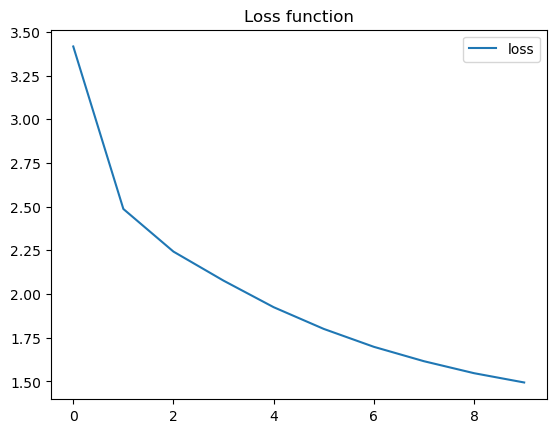

In [242]:
hsitory.plot(title = "Loss function")

As we can see from the loss function curve, the curve continues to decrease, which means we can continue training by increasing the number of epochs. In this work, we keep the number of epochs at 10 because training takes a long time.

## **Example of generate text**

In [243]:
from tensorflow.keras.models import load_model

### **Save model**

In [244]:
model.save("saved_model.h5")

### **Load saved model**

In [246]:
saved_model = create_model(character_size, embed_dim, rnn_neurons, batch_size=1)

saved_model.load_weights('saved_model.h5')

saved_model.build(tf.TensorShape([1, None]))


In [247]:
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (1, None, 64)             4160      
_________________________________________________________________
gru_2 (GRU)                  (1, None, 1026)           3361176   
_________________________________________________________________
dense_2 (Dense)              (1, None, 65)             66755     
Total params: 3,432,091
Trainable params: 3,432,091
Non-trainable params: 0
_________________________________________________________________


### **Function to generate text**

In [257]:
def generate_text(model, start_text):
    
    #Number of characters to generate
    num_char_generate = 2000 
    
    #vectorising input text
    input_text_number = [char_int[i] for i in start_text] 
    input_text_number = tf.expand_dims(input_text_number, 0)

    text_generated = []

    # Temperature is used to affect the probability of following characters.
    # Higher probability == less surprising/more expected
    # A lower temperature == more surprising / less expect
    
    temperature = 0.5

    # For batch size == 1
    model.reset_states()
    
    for i in range(num_char_generate):
        
        predictions = model(input_text_number)
        
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # Use a categorical distribution to select the next character
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # We pass predicted character for next input
        input_text_number = tf.expand_dims([predicted_id], 0)

        text_generated.append(unique_char_array[predicted_id])

    return (start_text + ''.join(text_generated))

In [258]:
#Prediction with User Input
print(generate_text(saved_model, start_text="Provost:"))

Provost:
Where I will not that we dead the figely of the died.

QUEEN ELIZABETH:
The hands of her and to you the world and heart:
I will therefore fair of the peeport with thee and that we seem to be in him
That we bedind thee the state to dispose the highness and hangs?

BUCKINGHAM:
Why, he consure the fire of wares,
That he with this dishonour's honest as forth your faith
Be and mistress my heart to said and heart
Untt of the strange that shall be strong to be consul.

KING RICHARD II:
Stay, do not speak thee to stand the most makes me stear
And with the prince of my love, they are an out
My present to the world to the world have some hand,
The prince with the patience and and his lasts
Than this wife and hath bone thee and field and sure
Than we be sovereign being fight begin that he shall stands my sine,
To answer the pate that so my king.

DUKE VINCENTIO:
The stands of his prance that with a man
To see the world think the patient in the triempland at the world.

KING EDWARD IV:
An

## **Bibliography**

1. [Link Github](https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/text_generation_shakespeare_rnn/text_generation_shakespeare_rnn.ipynb) 

2. [Link Kaggle](https://www.kaggle.com/code/aashkatrivedi/shakespeare-text-generation) 

3. [Deep Learning with TensorFlow and Keras | MasterClass Python on Udemy](https://www.udemy.com/course/cours-complet-de-deep-learning-avec-tensorflow-et-keras/learn/lecture/27860894#overview)